In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import codecs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [3]:
df=pd.read_json("/content/drive/My Drive/train.json")
df.shape

(39774, 3)

In [4]:
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


**PREPROCESSING** **OF** **DATASET** 

In [5]:
#Converting the ingredients column into a list of list format
col_ingredients=df['ingredients']
col_ingredients =col_ingredients.to_list()
col_ingredients

[['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles'],
 ['plain flour',
  'ground pepper',
  'salt',
  'tomatoes',
  'ground black pepper',
  'thyme',
  'eggs',
  'green tomatoes',
  'yellow corn meal',
  'milk',
  'vegetable oil'],
 ['eggs',
  'pepper',
  'salt',
  'mayonaise',
  'cooking oil',
  'green chilies',
  'grilled chicken breasts',
  'garlic powder',
  'yellow onion',
  'soy sauce',
  'butter',
  'chicken livers'],
 ['water', 'vegetable oil', 'wheat', 'salt'],
 ['black pepper',
  'shallots',
  'cornflour',
  'cayenne pepper',
  'onions',
  'garlic paste',
  'milk',
  'butter',
  'salt',
  'lemon juice',
  'water',
  'chili powder',
  'passata',
  'oil',
  'ground cumin',
  'boneless chicken skinless thigh',
  'garam masala',
  'double cream',
  'natural yogurt',
  'bay leaf'],
 ['plain flour',
  'sugar',
  'butter',
  'eggs',
  'fresh ginger root',
  'salt',
  'ground 

In [6]:
# The ingredients containing more than one words are joined through underscore
hyphenated_ing_list=[]
for i in col_ingredients:
  li=[]
  for j in i:
    li.append(j.replace(" ","_"))
  hyphenated_ing_list.append(li)
  
hyphenated_ing_list

[['romaine_lettuce',
  'black_olives',
  'grape_tomatoes',
  'garlic',
  'pepper',
  'purple_onion',
  'seasoning',
  'garbanzo_beans',
  'feta_cheese_crumbles'],
 ['plain_flour',
  'ground_pepper',
  'salt',
  'tomatoes',
  'ground_black_pepper',
  'thyme',
  'eggs',
  'green_tomatoes',
  'yellow_corn_meal',
  'milk',
  'vegetable_oil'],
 ['eggs',
  'pepper',
  'salt',
  'mayonaise',
  'cooking_oil',
  'green_chilies',
  'grilled_chicken_breasts',
  'garlic_powder',
  'yellow_onion',
  'soy_sauce',
  'butter',
  'chicken_livers'],
 ['water', 'vegetable_oil', 'wheat', 'salt'],
 ['black_pepper',
  'shallots',
  'cornflour',
  'cayenne_pepper',
  'onions',
  'garlic_paste',
  'milk',
  'butter',
  'salt',
  'lemon_juice',
  'water',
  'chili_powder',
  'passata',
  'oil',
  'ground_cumin',
  'boneless_chicken_skinless_thigh',
  'garam_masala',
  'double_cream',
  'natural_yogurt',
  'bay_leaf'],
 ['plain_flour',
  'sugar',
  'butter',
  'eggs',
  'fresh_ginger_root',
  'salt',
  'ground_

In [7]:
#The list is updated such that the each recipe is a single string and the ingredients are separated by spaces

li=[]
for i in hyphenated_ing_list:
  li.append(' '.join(j for j in i))

li

['romaine_lettuce black_olives grape_tomatoes garlic pepper purple_onion seasoning garbanzo_beans feta_cheese_crumbles',
 'plain_flour ground_pepper salt tomatoes ground_black_pepper thyme eggs green_tomatoes yellow_corn_meal milk vegetable_oil',
 'eggs pepper salt mayonaise cooking_oil green_chilies grilled_chicken_breasts garlic_powder yellow_onion soy_sauce butter chicken_livers',
 'water vegetable_oil wheat salt',
 'black_pepper shallots cornflour cayenne_pepper onions garlic_paste milk butter salt lemon_juice water chili_powder passata oil ground_cumin boneless_chicken_skinless_thigh garam_masala double_cream natural_yogurt bay_leaf',
 'plain_flour sugar butter eggs fresh_ginger_root salt ground_cinnamon milk vanilla_extract ground_ginger powdered_sugar baking_powder',
 'olive_oil salt medium_shrimp pepper garlic chopped_cilantro jalapeno_chilies flat_leaf_parsley skirt_steak white_vinegar sea_salt bay_leaf chorizo_sausage',
 'sugar pistachio_nuts white_almond_bark flour vanilla_e

In [8]:
# instantiate the vectorizer object
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# convert the recipes into a matrix
tfidf_wm = tfidfvectorizer.fit_transform(li)

tfidf_tokens = tfidfvectorizer.get_feature_names()

df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)

print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)



TD-IDF Vectorizer

       10_oz   14  14_oz  15_oz  ...  zinfandel  ziti  zucchini  zucchini_blossoms
0        0.0  0.0    0.0    0.0  ...        0.0   0.0       0.0                0.0
1        0.0  0.0    0.0    0.0  ...        0.0   0.0       0.0                0.0
2        0.0  0.0    0.0    0.0  ...        0.0   0.0       0.0                0.0
3        0.0  0.0    0.0    0.0  ...        0.0   0.0       0.0                0.0
4        0.0  0.0    0.0    0.0  ...        0.0   0.0       0.0                0.0
...      ...  ...    ...    ...  ...        ...   ...       ...                ...
39769    0.0  0.0    0.0    0.0  ...        0.0   0.0       0.0                0.0
39770    0.0  0.0    0.0    0.0  ...        0.0   0.0       0.0                0.0
39771    0.0  0.0    0.0    0.0  ...        0.0   0.0       0.0                0.0
39772    0.0  0.0    0.0    0.0  ...        0.0   0.0       0.0                0.0
39773    0.0  0.0    0.0    0.0  ...        0.0   0.0       0.0    

In [9]:
svd = TruncatedSVD(n_components=30, random_state=42)

X_svd = svd.fit_transform(df_tfidfvect)

**KMEANS** **CLUSTERING**

In [11]:
# Finding the optimum k value for kmeans
sil=[]
kmax=10

for k in range(2,kmax+1):
  kmeans = KMeans(n_clusters =k, random_state = 0).fit(X_svd)
  labels = kmeans.labels_
  sil.append(silhouette_score(X_svd,labels))

sil

[0.15421126533831006,
 0.14010055967277107,
 0.0920665064818288,
 0.08930986252138934,
 0.10004595635792736,
 0.08698403105788396,
 0.08391461512162042,
 0.08235271018400023,
 0.08790896990420013]

In [12]:
kmeans = KMeans(n_clusters =2, random_state = 0)
y_kmeans = kmeans.fit_predict(X_svd)
clusters = y_kmeans.tolist()
Counter(clusters)

Counter({0: 5894, 1: 33880})

In [13]:
print(len(kmeans.labels_))
kmeans.labels_

39774


array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

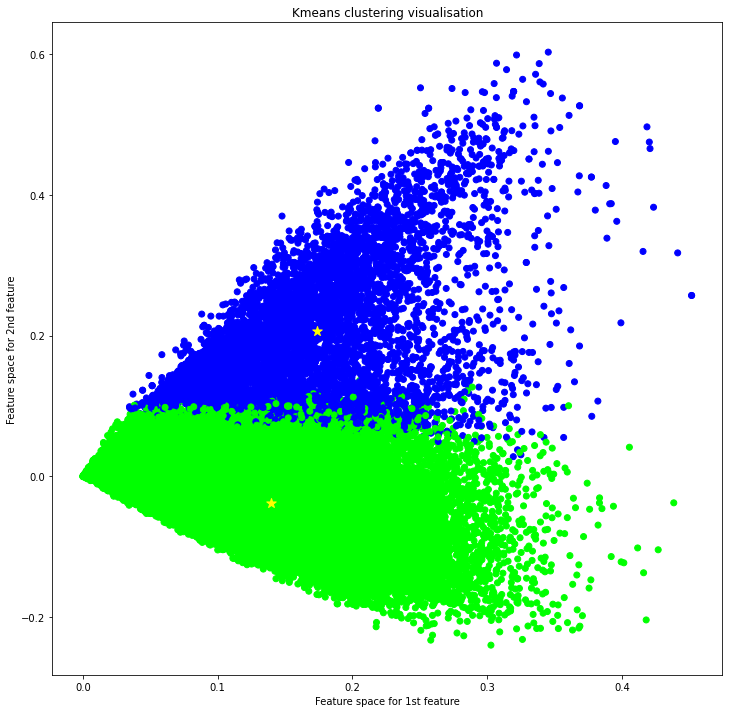

In [14]:
plt.figure(figsize=(12,12))
plt.scatter(X_svd[:,0],X_svd[:,1], c=kmeans.labels_,cmap='brg')
plt.title('Kmeans clustering visualisation')
plt.xlabel("Feature space for 1st feature")
plt.ylabel("Feature space for 2nd feature")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color="yellow",marker='*')

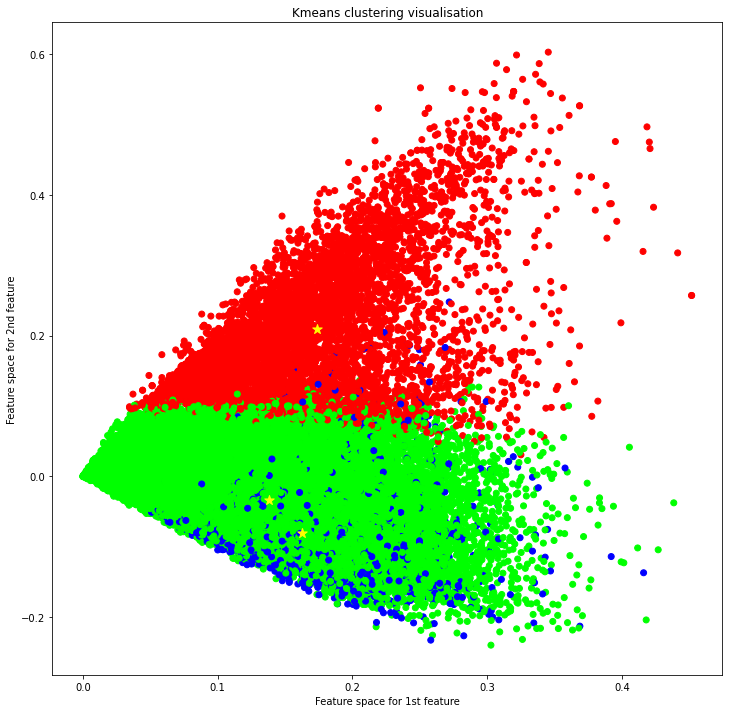

In [15]:
kmeans = KMeans(n_clusters =3, random_state = 0)
y_kmeans = kmeans.fit_predict(X_svd)
clusters = y_kmeans.tolist()
Counter(clusters)

plt.figure(figsize=(12,12))
plt.scatter(X_svd[:,0],X_svd[:,1], c=kmeans.labels_,cmap='brg')
plt.title('Kmeans clustering visualisation')
plt.xlabel("Feature space for 1st feature")
plt.ylabel("Feature space for 2nd feature")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color="yellow",marker='*')

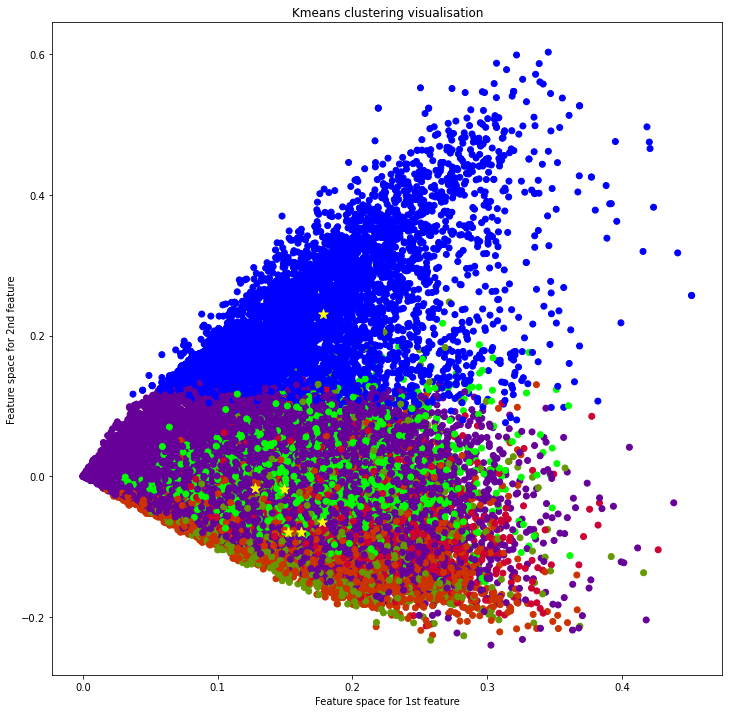

In [16]:
kmeans = KMeans(n_clusters =6, random_state = 0)
y_kmeans = kmeans.fit_predict(X_svd)
clusters = y_kmeans.tolist()
Counter(clusters)

plt.figure(figsize=(12,12))
plt.scatter(X_svd[:,0],X_svd[:,1], c=kmeans.labels_,cmap='brg')
plt.title('Kmeans clustering visualisation')
plt.xlabel("Feature space for 1st feature")
plt.ylabel("Feature space for 2nd feature")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color="yellow",marker='*')

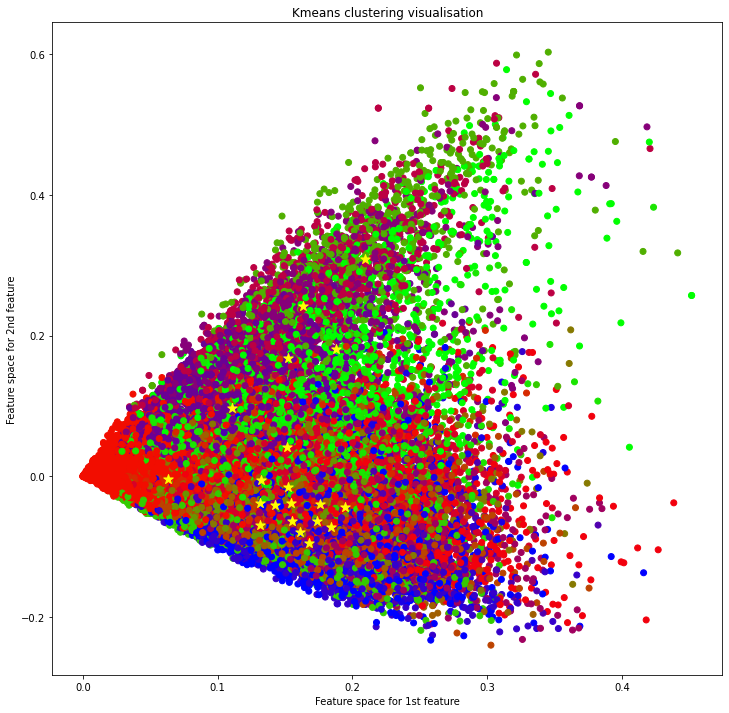

In [17]:
kmeans = KMeans(n_clusters =20, random_state = 0)
y_kmeans = kmeans.fit_predict(X_svd)
clusters = y_kmeans.tolist()
Counter(clusters)

plt.figure(figsize=(12,12))
plt.scatter(X_svd[:,0],X_svd[:,1], c=kmeans.labels_,cmap='brg')
plt.title('Kmeans clustering visualisation')
plt.xlabel("Feature space for 1st feature")
plt.ylabel("Feature space for 2nd feature")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color="yellow",marker='*')

**HIERARCHICAL** **CLUSTERING**

In [18]:
X_svd_df=pd.DataFrame(X_svd)
X_svd_df=X_svd_df[:10000]
X_svd_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.107908,-0.081011,-0.009582,-0.034690,-0.018200,0.034066,-0.071211,-0.037971,0.144112,0.016844,-0.061918,0.015295,0.021824,0.085507,0.050432,0.005951,-0.006367,-0.041134,0.018499,0.001393,0.022831,-0.003898,0.039933,0.036588,-0.041275,0.092147,0.006381,-0.051332,-0.060326,0.039684
1,0.209581,0.081474,-0.018078,-0.061238,-0.012615,0.107795,-0.072770,0.038832,-0.121277,-0.004449,-0.145734,-0.127394,-0.102305,-0.059103,0.144898,-0.016681,0.126433,0.069858,-0.081447,0.117124,-0.038442,0.038055,0.067155,0.038352,0.061798,-0.062224,-0.051845,0.002674,-0.038213,-0.076867
2,0.195175,0.041161,0.073123,-0.077585,-0.097245,0.117078,-0.127738,-0.041082,-0.024580,0.001178,-0.027248,0.026466,0.121003,-0.041635,0.080742,0.090558,0.006636,0.020624,0.012401,-0.023772,-0.027855,-0.076263,0.065322,-0.019792,-0.010135,0.017019,0.074043,0.063130,-0.002633,-0.026629
3,0.177762,0.025922,0.089602,0.005964,0.021988,0.036080,0.103918,-0.031281,-0.131844,0.150668,0.042587,-0.121413,-0.044915,0.178829,0.108086,-0.007990,0.113234,-0.028532,0.072046,0.093113,0.094492,-0.036895,-0.012677,0.028833,0.068855,-0.017074,-0.023803,-0.012718,0.032571,0.042074
4,0.237210,-0.010411,0.034837,-0.126689,0.019185,0.130465,0.137257,-0.030997,-0.099646,-0.119278,0.059084,0.044671,0.117318,-0.057260,-0.032949,0.058065,0.002143,0.016373,0.037221,0.103021,-0.011153,0.114135,-0.053611,0.001327,-0.028910,-0.029450,-0.039029,0.010422,-0.027552,-0.004456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.195041,0.069500,-0.068017,0.041720,0.105440,-0.096972,-0.005765,0.096007,-0.036656,0.022933,0.066452,0.157789,-0.157942,-0.046702,0.131250,0.157636,0.040429,-0.045129,0.113012,0.026202,-0.009621,0.005070,0.007975,0.004410,-0.014075,-0.084394,-0.007003,0.062790,0.048071,0.125820
9996,0.115626,-0.107515,-0.223842,0.244948,0.031710,0.120626,-0.042343,-0.076053,-0.030201,0.041764,-0.021184,0.003717,0.022525,-0.053598,-0.065252,-0.031569,-0.012929,-0.019207,0.004925,-0.009662,0.050290,-0.010008,0.027493,-0.028002,0.023008,0.009544,-0.041991,-0.020870,-0.029952,0.031591
9997,0.180906,-0.001030,-0.099942,0.143176,0.036619,0.072472,0.034536,-0.055749,0.037509,-0.027439,0.057707,-0.072596,0.046593,0.035968,0.023764,-0.035180,0.040363,0.011504,0.074426,-0.005217,-0.013732,-0.000828,-0.014153,-0.006925,-0.079886,0.018108,0.048775,-0.101511,0.076914,-0.009783
9998,0.249321,-0.176594,0.013487,-0.215156,0.203757,0.010717,-0.058437,0.014761,0.157399,-0.082958,-0.021968,-0.024070,0.062350,-0.009431,-0.112268,0.000253,0.034580,0.049242,0.022728,0.115158,0.071154,-0.013656,0.066823,-0.045206,0.025739,-0.073906,-0.058910,-0.023895,0.017083,-0.033158


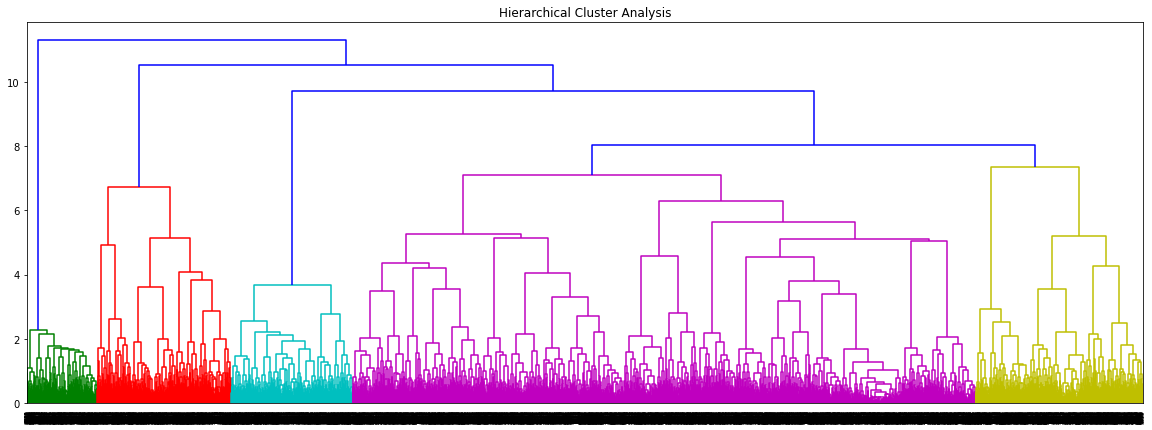

In [19]:
plt.figure(figsize=(20, 7))
plt.title("Hierarchical Cluster Analysis")
plt.xticks(rotation='horizontal')

dend = shc.dendrogram(shc.linkage(X_svd_df, method='ward'))

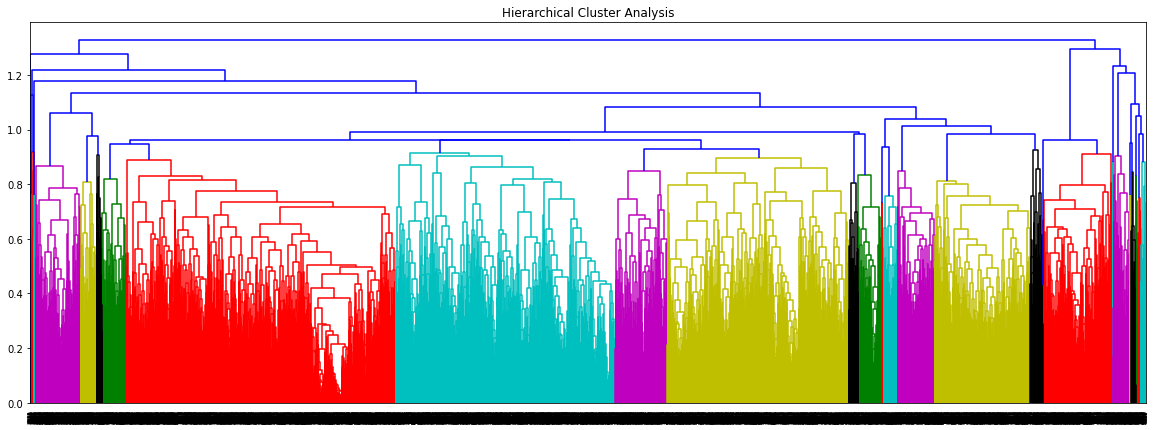

In [20]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 7))
plt.title("Hierarchical Cluster Analysis")
plt.xticks(rotation='horizontal')

dend = shc.dendrogram(shc.linkage(X_svd_df, method='complete'))

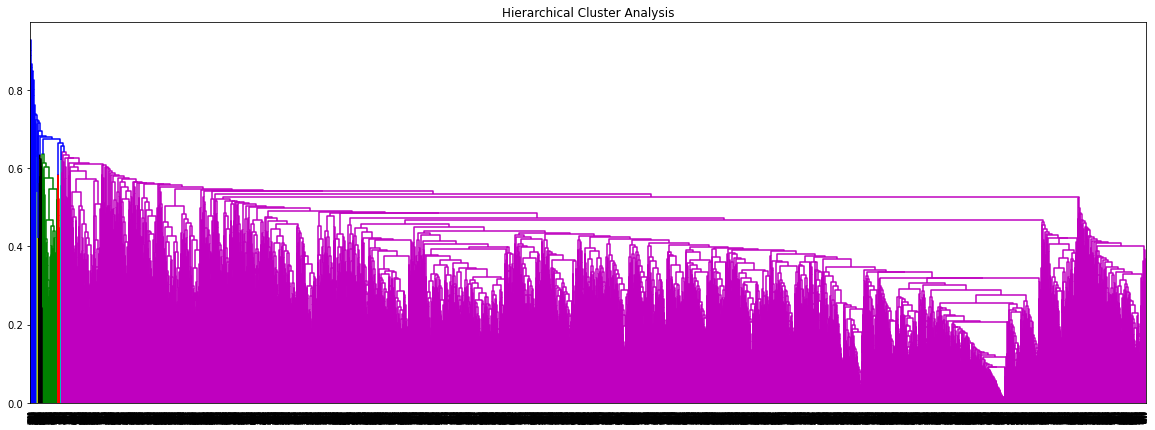

In [21]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 7))
plt.title("Hierarchical Cluster Analysis")
plt.xticks(rotation='horizontal')

dend = shc.dendrogram(shc.linkage(X_svd_df, method='average'))